# WPA #8 - ANOVA Chapter 14

## Facebook Attraction


In this WPA, you will analyze data from a (again...fake) study on attraction. In the study, 1000 heterosexual University students viewed the Facebook profile of another student (the "target") of the opposite sex. Based on a target's profile, each participant made three judgments about the target - intelligence, attractiveness, and dateability. The primary judgement was a *dateability* rating indicating how dateable the person was on a scale of 0 to 100.

### A. Data loading and preparation

1. Open a new script and enter your name, date, and the wpa number at the top. Set the working directory to the appropriate location using `setwd` (or add the script to your R Project). Save the script in the `R` folder in your project working directory as `wpa_8_LASTFIRST.R`, where LAST and FIRST are your last and first names. 

2. The data are located at https://github.com/laurafontanesi/RcourseSpring2019/blob/master/data/facebook.txt. Download the data appropriately and load them using `read.table()` as a new object called `facebook`.

3. Look at the first few rows of the dataframe with the `head()` function to make sure it loaded correctly.

4. Using the `str()` function, look at the structure of the dataframe to make sure everything looks ok.

In [1]:
#1
setwd('~/git/RcourseSpring2019/data/')

#2
facebook <- read.table("facebook.txt", 
                       sep = "\t", 
                       header = TRUE)

#3
head(facebook)

#4
str(facebook)

session,sex,age,haircolor,university,education,shirtless,intelligence,attractiveness,dateability
1,m,23,brown,3.Geneva,3.Masters,2.Yes,1.low,3.high,15
1,m,19,blonde,2.Zurich,1.HighSchool,1.No,2.medium,2.medium,44
1,f,22,brown,2.Zurich,2.Bachelors,2.Yes,1.low,2.medium,100
1,f,22,red,2.Zurich,2.Bachelors,1.No,2.medium,3.high,100
1,m,23,brown,3.Geneva,2.Bachelors,1.No,2.medium,2.medium,63
1,m,26,blonde,2.Zurich,3.Masters,2.Yes,3.high,3.high,76


'data.frame':	1000 obs. of  10 variables:
 $ session       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ sex           : Factor w/ 2 levels "f","m": 2 2 1 1 2 2 1 2 1 1 ...
 $ age           : int  23 19 22 22 23 26 19 25 22 19 ...
 $ haircolor     : Factor w/ 3 levels "blonde","brown",..: 2 1 2 3 2 1 2 3 2 1 ...
 $ university    : Factor w/ 3 levels "1.Basel","2.Zurich",..: 3 2 2 2 3 2 3 2 2 3 ...
 $ education     : Factor w/ 4 levels "1.HighSchool",..: 3 1 2 2 2 3 1 3 2 1 ...
 $ shirtless     : Factor w/ 2 levels "1.No","2.Yes": 2 1 2 1 1 2 1 2 2 1 ...
 $ intelligence  : Factor w/ 3 levels "1.low","2.medium",..: 1 2 1 2 2 3 1 3 2 2 ...
 $ attractiveness: Factor w/ 3 levels "1.low","2.medium",..: 3 2 2 3 2 3 2 1 2 2 ...
 $ dateability   : int  15 44 100 100 63 76 61 26 76 40 ...


#### Datafile description

The data file has 1000 rows and 10 columns. Here are the columns

- `session`: The experiment session in which the study was run. There were 50 total sessions.

- `sex`: The sex of the target

- `age`: The age of the target

- `haircolor`: The haircolor of the target

- `university`: The university that the target attended.

- `education`: The highest level of education obtained by the target.

- `shirtless`: Did the target have a shirtless profile picture? 1.No v 2.Yes

- `intelligence`: How intelligent do you find this target? 1.Low, 2.Medium, 3.High

- `attractiveness`: How physically attractive do you find this target? 1.Low, 2.Medium, 3.High

- `dateability`: How dateable is this target? 0 to 100.

#### Answer guidelines Read carefully to save yourself time!

- For each question, conduct the appropriate ANOVA. Write the conclusion in APA style. To summarize an effect in an ANOVA, use the format F(XXX, YYY) = FFF, p = PPP, where XXX is the degrees of freedom of the variable you are testing, YYY is the degrees of freedom of the residuals, FFF is the F value for the variable you are testing, and PPP is the p-value. If the p-value is less than .01, just write p < .01.

- For the purposes of this class, if the p-value of the ANOVA is less than .05, conduct post-hoc tests. If you are only testing one independent variable, write APA conclusions for the post-hoc test. **If you are testing more than one independent variable in your ANOVA, you do not need to write APA style conclusions for post-hoc tests -- just print the result.**

For example, here is how you would analyze and answer the question: "Was there an effect of diets on Chicken Weights?""

In [2]:
# ANOVA on Chicken Weights
#   IV = Diet, DV = weight

print('Answer Z0')
# ANOVA
aov.z0 <- aov(formula = weight ~ Diet,
              data = ChickWeight)

summary(aov.z0)

# ANOVA was significant (p < .01), so I'll conduct post-hoc tests

# Tukey post-hoc tests
TukeyHSD(aov.z0)

print('There was a significant main effect of diets on chicken weights (F(3, 574) = 10.81, p < .01). Pairwise Tukey HSD tests showed significant differences between diets 1 and 3 (diff = 40.30, p < .01) and diets 1 and 4 (diff = 32.62, p < .01). All other pairwise differences were not significant at the 0.05 significance threshold.')

[1] "Answer Z0"


             Df  Sum Sq Mean Sq F value   Pr(>F)    
Diet          3  155863   51954   10.81 6.43e-07 ***
Residuals   574 2758693    4806                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ Diet, data = ChickWeight)

$Diet
         diff         lwr      upr     p adj
2-1 19.971212  -0.2998092 40.24223 0.0552271
3-1 40.304545  20.0335241 60.57557 0.0000025
4-1 32.617257  12.2353820 52.99913 0.0002501
3-2 20.333333  -2.7268370 43.39350 0.1058474
4-2 12.646045 -10.5116315 35.80372 0.4954239
4-3 -7.687288 -30.8449649 15.47039 0.8277810


[1] "There was a significant main effect of diets on chicken weights (F(3, 574) = 10.81, p < .01). Pairwise Tukey HSD tests showed significant differences between diets 1 and 3 (diff = 40.30, p < .01) and diets 1 and 4 (diff = 32.62, p < .01). All other pairwise differences were not significant at the 0.05 significance threshold."


## B. One-way ANOVAS

1. Was there a main effect of the university on dateability? Conduct a one-way ANOVA. If the result is significant (p < .05), conduct post-hoc tests.

2. Was there a main effect of intelligence on dateability? Conduct a one-way ANOVA. If the result is significant (p < .05), conduct post-hoc tests.

3. Was there a main effect of haircolor on dateability? Conduct a one-way ANOVA. If the result is significant (p < .05), conduct post-hoc tests.

In [3]:
print('Answer 1')
aov.b1 <- aov(formula = dateability ~ university,
              data = facebook)

summary(aov.b1)

TukeyHSD(aov.b1)

print('There was a significant main effect of university on dateability (F(2, 997) = 13.99, p < .01). Pairwise Tukey HSD tests showed significant differences between Zurich and Basel (diff = -10.27, p < .01), with students from Basel more dateable on average than students from Zurich, and Geneva and Basel (diff = -8.64, p < .01), with Basel students also more dateable on average than Geneva students. All other pairwise differences were not significant at the 0.05 significance threshold.')

print('Answer 2')
aov.b2 <- aov(formula = dateability ~ intelligence,
              data = facebook)

summary(aov.b2)

TukeyHSD(aov.b2)

print('There was a significant main effect of intelligence on dateability (F(2, 997) = 4.97, p < .01). Pairwise Tukey HSD tests showed significant differences between Medium and Low intelligence, with Medium intelligence Targets considered more dateable on average (diff = 6.53, p < .01). All other pairwise differences were not significant at the 0.05 significance threshold.')

print('Answer 3')
aov.b3 <- aov(formula = dateability ~ haircolor,
              data = facebook)

summary(aov.b3)

print('There was no significant main effect of haircolor on dateability (F(2, 997) = 1.23, p = 0.29).')

[1] "Answer 1"


             Df Sum Sq Mean Sq F value   Pr(>F)    
university    2  19769    9884   13.99 1.01e-06 ***
Residuals   997 704173     706                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = dateability ~ university, data = facebook)

$university
                        diff        lwr       upr     p adj
2.Zurich-1.Basel  -10.275500 -15.099617 -5.451383 0.0000020
3.Geneva-1.Basel   -8.641689 -13.586611 -3.696767 0.0001311
3.Geneva-2.Zurich   1.633811  -3.122189  6.389811 0.6991862


[1] "There was a significant main effect of university on dateability (F(2, 997) = 13.99, p < .01). Pairwise Tukey HSD tests showed significant differences between Zurich and Basel (diff = -10.27, p < .01), with students from Basel more dateable on average than students from Zurich, and Geneva and Basel (diff = -8.64, p < .01), with Basel students also more dateable on average than Geneva students. All other pairwise differences were not significant at the 0.05 significance threshold."
[1] "Answer 2"


              Df Sum Sq Mean Sq F value Pr(>F)   
intelligence   2   7070    3535   4.917 0.0075 **
Residuals    997 716871     719                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = dateability ~ intelligence, data = facebook)

$intelligence
                     diff       lwr       upr     p adj
2.medium-1.low   6.535264  1.615557 11.454970 0.0053173
3.high-1.low     2.865833 -2.070710  7.802375 0.3610523
3.high-2.medium -3.669431 -8.458242  1.119380 0.1705679


[1] "There was a significant main effect of intelligence on dateability (F(2, 997) = 4.97, p < .01). Pairwise Tukey HSD tests showed significant differences between Medium and Low intelligence, with Medium intelligence Targets considered more dateable on average (diff = 6.53, p < .01). All other pairwise differences were not significant at the 0.05 significance threshold."
[1] "Answer 3"


             Df Sum Sq Mean Sq F value Pr(>F)
haircolor     2   1779   889.7   1.228  0.293
Residuals   997 722162   724.3               

[1] "There was no significant main effect of haircolor on dateability (F(2, 997) = 1.23, p = 0.29)."


## C. Multi-independent ANOVAs

1. Conduct a two-way ANOVA on dateability with both university and haircolor as IVs. Do your results for each variable change compared to your previous one-way ANOVAs on these variables? (You do not need to give APA results or conduct post-hoc tests, just answer the question verbally).

2. Conduct a multi-way anova including sex, haircolor, university, education, shirtless, intelligence and attractiveness as independent variables predicting dateability. Do not include interactions. Which variables are significantly related to dateability? (*Do* write APA results for each variable but do *not* conduct post-hoc tests).

In [4]:
print('Answer 1')
aov.c1 <- aov(formula = dateability ~ university + haircolor,
              data = facebook)

summary(aov.c1)

print('Answer: Broadly the results are the same, although the exact p and F values are slightly different. This is because the residual sums of squares is calculated differently when you add more variables. You can also see that the p and F values (and non-residual sums of squares) are slightly different for `p8a` and `p8b` which only differ in the order in which the variables are entered. This is because `aov` uses type 1 sums of squares, which performs the anova sequentially. This can make a big difference if you have an unbalanced design, but normally the results should be broadly the same however you do the analysis.')


print('Answer 2')
aov.c2 <- aov(formula = dateability ~ sex + haircolor + university + education + shirtless + intelligence + attractiveness,
              data = facebook)

summary(aov.c2)

print('Answer: There were significant effects of sex (F(1, 986) = 66.10, p < .01), university (F(2, 986) = 17.35, p < .01), intelligence (F(2, 986) = 5.34, p < .01) and attractiveness (F(2, 986) = 101.87, p < .01). Becasue the degrees of Freedom for our Sex variable is 1 (i.e. there are only 2 levels of this variable), we can also interpret the direction of this test without needing to conduct post-hoc tests, by looking at the means.')

aggregate(formula=dateability~sex, data=facebook, FUN=mean)

print('From this we can say that females are rated as more datebable on average than males.')

[1] "Answer 1"


             Df Sum Sq Mean Sq F value   Pr(>F)    
university    2  19769    9884  13.999 1.01e-06 ***
haircolor     2   1647     823   1.166    0.312    
Residuals   995 702526     706                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "Answer: Broadly the results are the same, although the exact p and F values are slightly different. This is because the residual sums of squares is calculated differently when you add more variables. You can also see that the p and F values (and non-residual sums of squares) are slightly different for `p8a` and `p8b` which only differ in the order in which the variables are entered. This is because `aov` uses type 1 sums of squares, which performs the anova sequentially. This can make a big difference if you have an unbalanced design, but normally the results should be broadly the same however you do the analysis."
[1] "Answer 2"


                Df Sum Sq Mean Sq F value   Pr(>F)    
sex              1  36514   36514  66.103 1.28e-15 ***
haircolor        2   1869     935   1.692  0.18466    
university       2  19172    9586  17.354 3.92e-08 ***
education        3   3186    1062   1.922  0.12424    
shirtless        1    106     106   0.192  0.66106    
intelligence     2   5904    2952   5.345  0.00491 ** 
attractiveness   2 112544   56272 101.872  < 2e-16 ***
Residuals      986 544646     552                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "Answer: There were significant effects of sex (F(1, 986) = 66.10, p < .01), university (F(2, 986) = 17.35, p < .01), intelligence (F(2, 986) = 5.34, p < .01) and attractiveness (F(2, 986) = 101.87, p < .01). Becasue the degrees of Freedom for our Sex variable is 1 (i.e. there are only 2 levels of this variable), we can also interpret the direction of this test without needing to conduct post-hoc tests, by looking at the means."


sex,dateability
f,60.50104
m,48.40499


[1] "From this we can say that females are rated as more datebable on average than males."


## D. Interactions

1. Create a plot (e.g.; `pirateplot()`, `barplot()`, `boxplot()`) showing dateability based on two independent variables: sex and shirtless. Based on what you see in the plot, do you expect there to be an interaction between sex and shirtless? Why or why not?

2. Test your prediction with the appropriate ANOVA.

3. Create a plot (e.g.; `pirateplot()`, `barplot()`, `boxplot()`) showing the distribution of dateability based on two independent variables: university and haircolor. Based on what you see in the plot, do you expect there to be an interaction between university and intelligence? Why or why not?

4. Test your prediction with the appropriate ANOVA.

[1] "Answer 1"
[1] "Yes there looks like an interaction!"
[1] "Answer 2"


               Df Sum Sq Mean Sq F value   Pr(>F)    
sex             1  36514   36514  62.689 6.43e-15 ***
shirtless       1    247     247   0.425    0.515    
sex:shirtless   1 107048  107048 183.786  < 2e-16 ***
Residuals     996 580132     582                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "Yes there is a significant interaction between sex and shirtlessness on dateability ((F(1, 996) = 183.79, p < .01)). Shirtlessness appears to increase dateability for women but decrease dateability for men."
[1] "Answer 3"


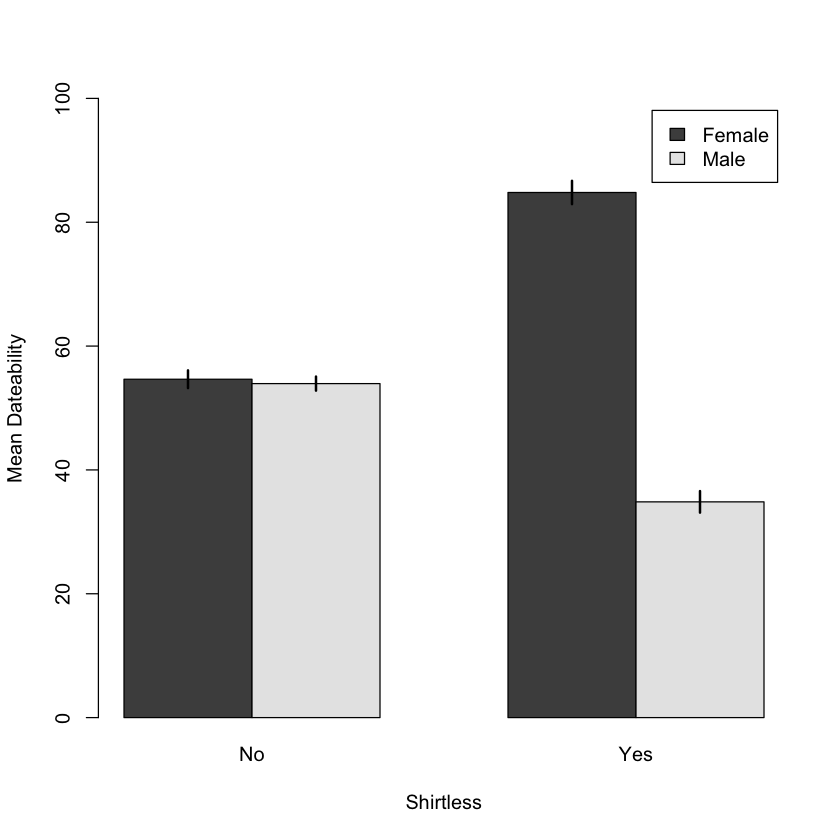

[1] "There does not look like an interaction"
[1] "Answer 4"


                      Df Sum Sq Mean Sq F value   Pr(>F)    
university             2  19769    9884  13.967 1.04e-06 ***
haircolor              2   1647     823   1.163    0.313    
university:haircolor   4   1217     304   0.430    0.787    
Residuals            991 701309     708                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "Yep! no significant interaction!"


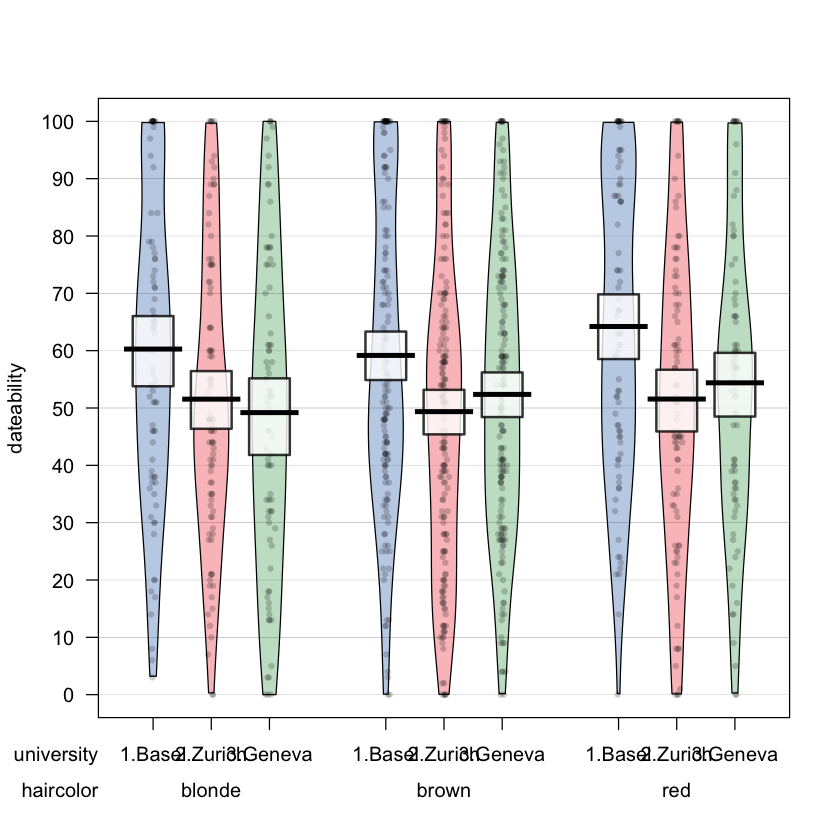

In [9]:
print('Answer 1')

#First calculate the mean dateability for each combination of Sex/Shirtlessness
date.means <- aggregate(dateability ~ sex + shirtless,
                      FUN = mean, 
                      data = facebook)

#Barplot actually needs matrix where the columns provide means separated by one of the variables (e.g. column 1 = shirt and column 2 = shirtless) and the rows provide the means separated by the other variable (e.g. Row 1 = Females and Row 2 = Males)
date.means.mtx <- cbind(date.means[1:2, 3], date.means[3:4, 3]) #creates the matrix, compare it to date.means
colnames(date.means.mtx) <- c("No", "Yes")    #gives the columns names
rownames(date.means.mtx) <- c("Female", "Male")     #gives the rows names


#then create the barplot. 
xpos<-barplot(height = date.means.mtx, 
        beside = TRUE, 
        legend.text = TRUE, 
        ylab = "Mean Dateability",
        xlab = "Shirtless",
        ylim= c(0, 100))


#To add standard errors. First calculate SD for each grouping in the same format as the mean matrix.
date.sd <- aggregate(dateability ~ sex + shirtless,
                      FUN = sd, 
                      data = facebook)

date.sd.mtx <- cbind(date.sd[1:2, 3], date.sd[3:4, 3])

# Then calculate number of particpants in each grouping. Make sure row/column format matches date.sd.mtx
date.n <- table(facebook$sex, facebook$shirtless)

#Then calculate SE
date.se.mtx <- date.sd.mtx/sqrt(date.n)


#Then Add to barplot using segements
segments(x0=xpos, x1=xpos, y0=date.means.mtx-date.se.mtx, y1= date.means.mtx+date.se.mtx, col="black", lwd=2)

print('Yes there looks like an interaction!')

print('Answer 2')
aov.d2 <- aov(dateability ~ sex * shirtless, 
            data = facebook)
            
summary(aov.d2)

print('Yes there is a significant interaction between sex and shirtlessness on dateability ((F(1, 996) = 183.79, p < .01)). Shirtlessness appears to increase dateability for women but decrease dateability for men.')


print('Answer 3')
library(yarrr)
#Example of boxplot code.
pirateplot(dateability ~ university + haircolor, 
           data = facebook)

print('There does not look like an interaction')

print('Answer 4')
aov.d4 <- aov(dateability ~ university * haircolor, 
           data = facebook)

summary(aov.d4)

print('Yep! no significant interaction!')

### E. ANOVAs on subsets of data

1. It turns out that the experimenter who ran sessions 1 through 30 was trying to score a date and slipped in his own profile picture into the study. We can't trust these data. Repeat your multi anova from question C2 ONLY for sessions 31 through 50. Do your conclusions change compared to when you analyzed the data from all sessions?

In [7]:
print('Answer 1')
aov.e1 <- aov(formula = dateability ~ sex + haircolor + university + education + shirtless + intelligence + attractiveness,
            data = subset(facebook, session > 30))

summary(aov.e1)

# The results look the same

[1] "Answer 1"


                Df Sum Sq Mean Sq F value   Pr(>F)    
sex              1   6933    6933  12.425 0.000474 ***
haircolor        2   2459    1230   2.203 0.111806    
university       2  12099    6050  10.842 2.62e-05 ***
education        3   2059     686   1.230 0.298479    
shirtless        1    184     184   0.330 0.565884    
intelligence     2    543     271   0.487 0.615135    
attractiveness   2  36084   18042  32.334 1.04e-13 ***
Residuals      386 215386     558                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### That's it! Now it's time to submit your assignment!

Save and email your `wpa_8_LastFirst.R` file to me at [laura.fontanesi@unibas.ch](mailto:laura.fontanesi@unibas.ch). 

Assignments sent after Sunday 28th April will not be considered (to pass the course you have to hand in all assignments for each week). 